In [2]:
import tensorflow as tf
import keras


In [3]:
print(keras.__version__)
print(tf.__version__)

3.9.2
2.19.0


#CNN Demo

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Flatten ,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [5]:
#Define image properties
img_height , img_width=128,128
batch_size =32

In [6]:
#Data Preparation
data_dir = 'Datasets/train'
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_data = datagen.flow_from_directory(data_dir,
target_size=(img_height,img_width),
batch_size=batch_size,
class_mode='categorical',
subset='training',
shuffle=True
)

Found 2198 images belonging to 5 classes.


In [8]:
val_data=datagen.flow_from_directory(
    data_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 548 images belonging to 5 classes.


In [9]:
#Defining CNN model 1
model = Sequential(
    [
        Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,3)),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.5),
        Dense(train_data.num_classes,activation='softmax')
    ]
)

c:\Users\cd246\OneDrive\Desktop\JAMIA-PRAC\AIMLPrac\PiyushVirtual\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',metrics=['accuracy']
)
history = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - accuracy: 0.9653 - loss: 0.0959 - val_accuracy: 0.6259 - val_loss: 2.2731
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.9746 - loss: 0.0617 - val_accuracy: 0.6277 - val_loss: 2.5169
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.9760 - loss: 0.0818 - val_accuracy: 0.6369 - val_loss: 2.1806
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.6588 - val_loss: 2.2874
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 222ms/step - accuracy: 0.9719 - loss: 0.0617 - val_accuracy: 0.6296 - val_loss: 2.2895
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9794 - loss: 0.0549 - val_accuracy: 0.6460 - val_loss: 2.2551
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - accuracy: 0.9819 - loss: 0.0514 - val_accuracy: 0.6387 - val_loss: 2.5209
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.9826 - loss: 0.0482 - val_accu

In [17]:
#Save Model
model.save('flower_cnn_model.h5')

In [18]:
import numpy as np
val_data.reset()
predictions = model.predict(val_data,verbose=1)
predicted_classes = np.argmax(predictions , axis=1)
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [19]:
for i in range(10):
    print(f"True: {class_labels[true_classes[i]]},Predicted : {class_labels[predicted_classes[i]]}")

True: daisy,Predicted : dandelion
True: daisy,Predicted : dandelion
True: daisy,Predicted : tulip
True: daisy,Predicted : sunflower
True: daisy,Predicted : tulip
True: daisy,Predicted : sunflower
True: daisy,Predicted : sunflower
True: daisy,Predicted : rose
True: daisy,Predicted : dandelion
True: daisy,Predicted : tulip


In [20]:
val_loss , val_accuracy = model.evaluate(val_data)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print(f'Validation Loss : {val_loss:.4f}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6054 - loss: 2.9066
Validation Accuracy: 62.96%
Validation Loss : 2.6115


Text(0.5, 1.0, 'Accuracy')

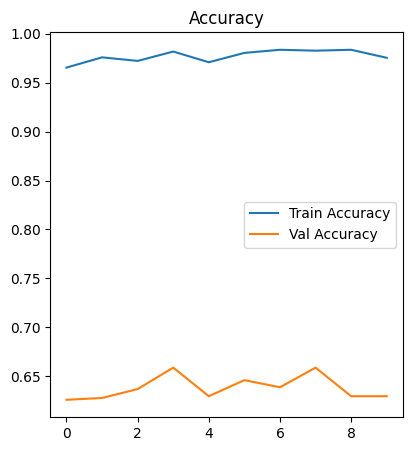

In [21]:
#Accuracy Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

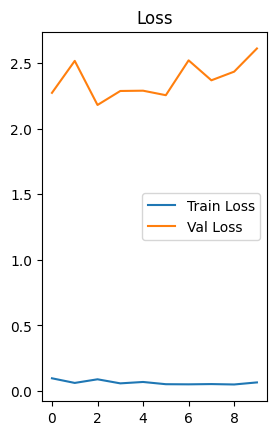

In [22]:
#Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()